# 2.4 Evaluating Hyperparameters

# Import Libraries and Data

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [8]:
#Import unscaled weather dataset
df_weather = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/weather_cleaned.csv')

In [10]:
df_weather.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,1960-01-01
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,1960-01-02
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7

In [12]:
df_weather.shape

(22950, 136)

In [14]:
#Import Prediction Data Set
df_answers = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [16]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_answers.shape

(22950, 16)

# Data Wrangling & Prep

In [21]:
#Reduce weather dataset to observations in the 2010's decade
df_decade = df_weather[(df_weather['DATE'].astype(str).str[:4] >= '2010') & (df_weather['DATE'].astype(str).str[:4] <= '2019')]
df_decade

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,1.0054,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0,2010-01-01
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,8,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0250,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2,2010-01-02
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.0156,0.25,0.12,0.0,

In [23]:
#Reduce answers dataset to observations from 2010's decade
answers_decade = df_answers[(df_answers['DATE'].astype(str).str[:4] >= '2010') & (df_answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#Extract stations list
stations = [col.split('_')[0] for col in df_decade.columns if '_' in col]

In [27]:
#Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [29]:
#Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  df_decade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  df_decade[station_columns].notna().sum().sum()

#Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
MUNCHENB: 32868 entries
KASSEL: 32868 entries
DUSSELDORF: 32868 entries
MAASTRICHT: 32868 entries
BUDAPEST: 32868 entries
LJUBLJANA: 32868 entries
STOCKHOLM: 32868 entries
VALENTIA: 32868 entries
BELGRADE: 32868 entries
MADRID: 32868 entries
OSLO: 32868 entries
HEATHROW: 32868 entries
DEBILT: 32868 entries
SONNBLICK: 32868 entries
BASEL: 32868 entries


In [39]:
#Drop 'DATE' column
df_decade.drop(['DATE'], axis=1, inplace=True)

KeyError: "['DATE'] not found in axis"

In [41]:
df_decade.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,1.0054,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,8,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0250,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.0156,0.25,0.12,0.0,-0.6,-1.2,0.7,6,0.67,1.017,

In [33]:
#Ensure correct shape
df_decade.shape

(3652, 135)

In [37]:
#Drop 'DATE' column from answers 
answers_decade.drop(columns = 'DATE', inplace = True)

KeyError: "['DATE'] not found in axis"

In [43]:
answers_decade.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Shaping the Data for Modelling

In [46]:
#Set the X axis with the 2010's weather data
X = df_decade

In [48]:
#Set the y axis with the 2010's answer data
y = answers_decade

In [50]:
#Ensure correct shapes
X.shape

(3652, 135)

In [52]:
y.shape

(3652, 15)

# Splitting the Data

In [55]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [57]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


# Hyperparameter Optimization

In [60]:
#Create a random forest classifier
clf = RandomForestClassifier()

In [62]:
#Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [64]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.413 total time=   1.4s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.442 total time=   1.6s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.449 total time=   1.3s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.423 total time=   1.4s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.448 total time=   3.5s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.427 total time=   3.0s
[

In [65]:
#Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6447608616283315


# Random Search

In [71]:
#Define random search 
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  
    'max_features': randint(30, 70),  
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [73]:
#Create a random forest classifier

clf2= RandomForestClassifier()

In [75]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 2.3187320033709207 minutes


In [77]:
#Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

#Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6447608616283315
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 69, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 175}
Best RANDOM search score is: 0.6400146038700255


# Random Forest with Optimized Search Parameters

In [80]:
#Create a random forrest classifier with the optimized parameters
clf3 = RandomForestClassifier(n_estimators = 175, max_depth= 80, max_features= 69, min_samples_leaf=1, min_samples_split=4)  

clf3.fit(X_train, y_train)

[CV 3/3] END criterion=gini, max_depth=None, max_features=37, min_samples_leaf=3, min_samples_split=2, n_estimators=175;, score=0.629 total time=  13.7s
[CV 3/3] END criterion=gini, max_depth=60, max_features=34, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.631 total time=  15.6s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=63, min_samples_leaf=2, min_samples_split=4, n_estimators=175;, score=0.627 total time=  52.3s
[CV 1/3] END criterion=gini, max_depth=50, max_features=58, min_samples_leaf=1, min_samples_split=8, n_estimators=225;, score=0.643 total time=  24.3s
[CV 1/3] END criterion=gini, max_depth=60, max_features=34, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.625 total time=  14.8s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=41, min_samples_leaf=1, min_samples_split=4, n_estimators=225;, score=0.627 total time=  51.1s
[CV 1/3] END criterion=gini, max_depth=70, max_features=46, min_samples_leaf=2, min_sa

RandomForestClassifier(max_depth=80, max_features=69, min_samples_split=4,
                       n_estimators=175)

In [82]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6593647316538883


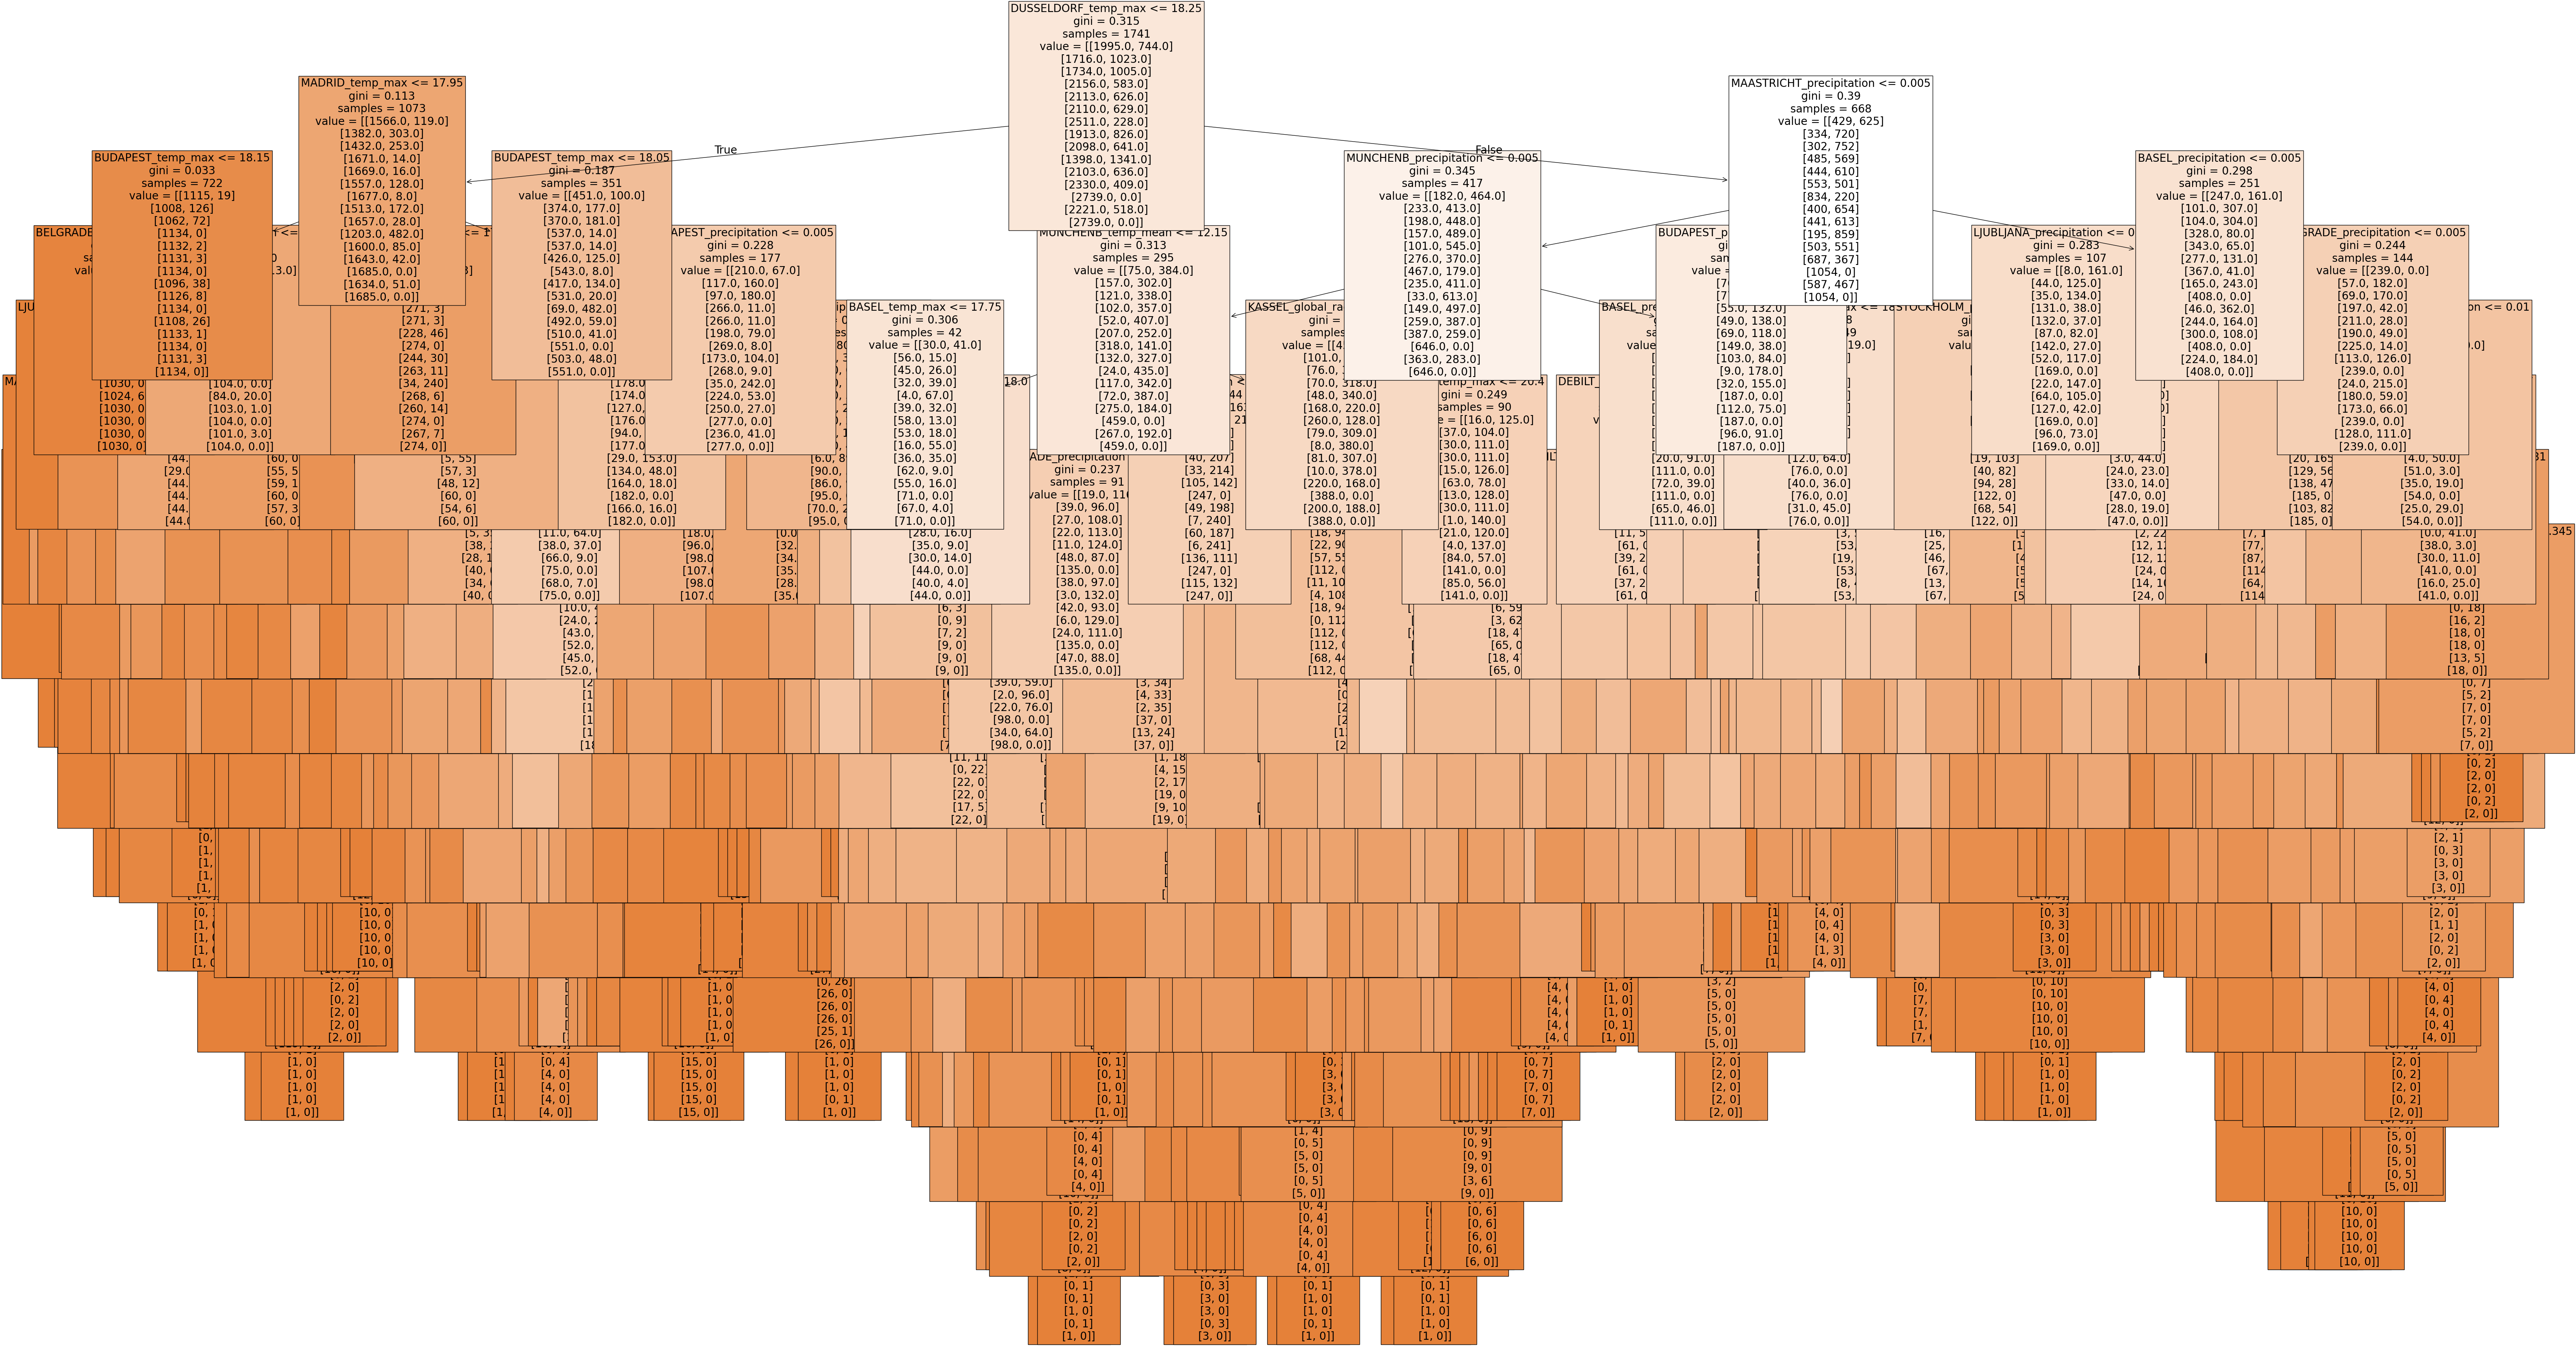

In [86]:
#Show random forest
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = df_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Uncovering Feature Importance

In [89]:
#Retrieve feature importances from the trained model
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.14484231e-03, 1.80616129e-03, 1.65354553e-03, 1.54924839e-03,
       3.15280025e-02, 3.18068017e-03, 7.23235213e-03, 1.43379551e-03,
       8.19541500e-02, 2.33522499e-03, 1.80308793e-03, 1.80800089e-03,
       1.56493910e-03, 2.92209725e-02, 1.75534275e-03, 2.59193033e-03,
       1.52159290e-03, 9.52422556e-03, 1.95836485e-04, 0.00000000e+00,
       0.00000000e+00, 6.95957465e-04, 2.88439377e-02, 7.33959093e-04,
       6.38145555e-03, 1.55668988e-03, 2.11312419e-02, 1.04730116e-03,
       1.53225240e-03, 1.70006373e-03, 2.12376446e-03, 1.96404055e-02,
       2.14656569e-03, 1.76435891e-03, 1.70512013e-03, 3.91860546e-02,
       9.20634492e-04, 1.24933970e-03, 1.47666350e-03, 1.75856945e-03,
       3.89327993e-02, 1.93548622e-03, 3.48634833e-03, 1.51256695e-03,
       1.19486069e-01, 1.52267302e-03, 2.62003291e-03, 1.74771649e-03,
       2.84219875e-03, 1.49910987e-02, 3.05945439e-03, 2.41854040e-03,
       1.61242951e-03, 9.10620340e-03, 1.24616716e-03, 1.28481928e-03,
      

In [91]:
#Reshape the array
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.14484231e-03, 1.80616129e-03, 1.65354553e-03, 1.54924839e-03,
         3.15280025e-02, 3.18068017e-03, 7.23235213e-03, 1.43379551e-03,
         8.19541500e-02],
        [2.33522499e-03, 1.80308793e-03, 1.80800089e-03, 1.56493910e-03,
         2.92209725e-02, 1.75534275e-03, 2.59193033e-03, 1.52159290e-03,
         9.52422556e-03],
        [1.95836485e-04, 0.00000000e+00, 0.00000000e+00, 6.95957465e-04,
         2.88439377e-02, 7.33959093e-04, 6.38145555e-03, 1.55668988e-03,
         2.11312419e-02],
        [1.04730116e-03, 1.53225240e-03, 1.70006373e-03, 2.12376446e-03,
         1.96404055e-02, 2.14656569e-03, 1.76435891e-03, 1.70512013e-03,
         3.91860546e-02],
        [9.20634492e-04, 1.24933970e-03, 1.47666350e-03, 1.75856945e-03,
         3.89327993e-02, 1.93548622e-03, 3.48634833e-03, 1.51256695e-03,
         1.19486069e-01],
        [1.52267302e-03, 2.62003291e-03, 1.74771649e-03, 2.84219875e-03,
         1.49910987e-02, 3.05945439e-03, 2.41854040e-03, 1.61242951

In [93]:
#Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.13148278, 0.05212532, 0.05953908, 0.07084589, 0.17075848,
       0.03992035, 0.02519771, 0.07471283, 0.14525429, 0.07805784,
       0.06069776, 0.04152373, 0.01327609, 0.03414702, 0.00246084])

In [95]:
#Extract stations list
stations = [col.split('_')[0] for col in df_decade.columns if '_' in col]

In [97]:
#Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [99]:
#Convert the set of unique stations to a list
unique_stations_list = list(unique_stations)

In [101]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BUDAPEST      0.170758
BELGRADE      0.145254
MUNCHENB      0.131483
MADRID        0.078058
VALENTIA      0.074713
MAASTRICHT    0.070846
OSLO          0.060698
DUSSELDORF    0.059539
KASSEL        0.052125
HEATHROW      0.041524
LJUBLJANA     0.039920
SONNBLICK     0.034147
STOCKHOLM     0.025198
DEBILT        0.013276
BASEL         0.002461
dtype: float64

In [103]:
# Create a df to associate weather stations with their importances
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MUNCHENB', 'KASSEL', 'DUSSELDORF', 'MAASTRICHT', 'BUDAPEST', 'LJUBLJANA', 'STOCKHOLM', 'VALENTIA', 'BELGRADE', 'MADRID', 'OSLO', 'HEATHROW', 'DEBILT', 'SONNBLICK', 'BASEL']


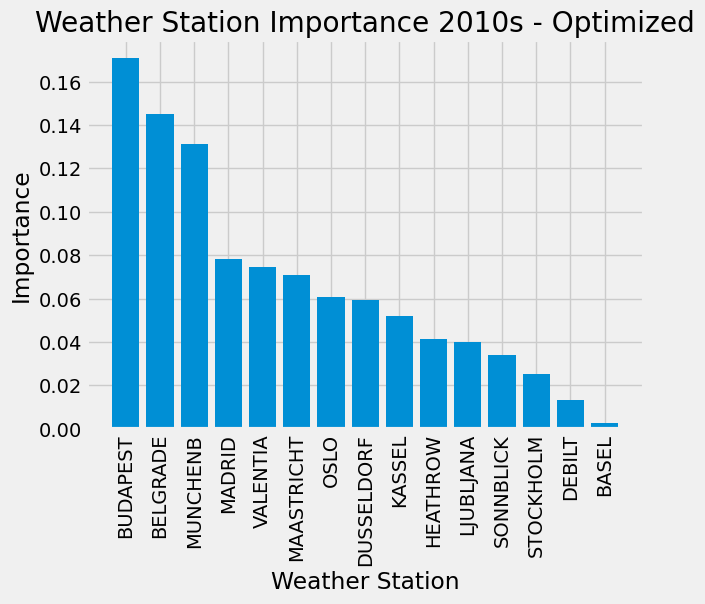

In [105]:
#Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.show()

# Random Forest: Budapest Station

In [108]:
#Filter weather dataset to only include Budapest
df_budapest = df_weather[df_weather.columns[df_weather.columns.astype(str).str.startswith('BUDAPEST')]]

df_budapest

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max
0,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1
1,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1
2,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3
3,4,0.67,1.017,0.19,0.00,0.0,2.0,0.4,4.4
4,4,0.67,1.017,0.19,0.00,0.0,2.5,1.1,5.3
...,...,...,...,...,...,...,...,...,...
22945,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22946,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22947,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22948,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2


In [110]:
#Filter answers dataset to only include Budapest
answers_budapest = df_answers[df_answers.columns[df_answers.columns.astype(str).str.startswith('BUDAPEST')]]

answers_budapest

,BUDAPEST_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [112]:
#Create matrices
y2 = answers_budapest.max(axis=1)

y2.shape

(22950,)

In [114]:
#Ensure y has the correct shape
y2 = y2.to_numpy().reshape(-1)

y2.shape

(22950,)

In [116]:
# Create X matrix
X2 = df_budapest.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [118]:
#Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [120]:
#Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [122]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [124]:
X_train

array([[ 5.    ,  0.54  ,  1.0125, ..., 22.5   , 18.6   , 27.1   ],
       [ 4.    ,  0.67  ,  1.017 , ..., -3.3   , -7.2   , -0.2   ],
       [ 6.    ,  0.67  ,  1.017 , ..., -0.4   , -1.3   ,  1.    ],
       ...,
       [ 8.    ,  0.82  ,  1.0176, ...,  8.8   ,  7.5   , 11.7   ],
       [ 4.    ,  0.67  ,  1.017 , ..., 19.8   , 16.4   , 24.3   ],
       [ 4.    ,  0.48  ,  1.0134, ..., 13.2   , 11.8   , 17.3   ]])

In [126]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

# Hyperparameter Optimization

In [129]:
#Create a RF classifier

clf = RandomForestClassifier()

In [131]:
# Grid search
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [133]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 2.006438704331716 minutes


In [135]:
#Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


# Random Search

In [138]:
#Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [140]:
#Create a RF classifier
clf2= RandomForestClassifier()

In [142]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 1.9759920318921407 minutes


In [143]:
#Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best RANDOM search score is: 1.0


In [146]:
#Grid search results vs.
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

#Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best RANDOM search score is: 1.0


# Running Random Forest with Optimized Search Parameters

In [149]:
#Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=9, max_features=3, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=3,
                       min_samples_split=4)

In [151]:
#Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
#Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


<Figure size 4000x2000 with 0 Axes>

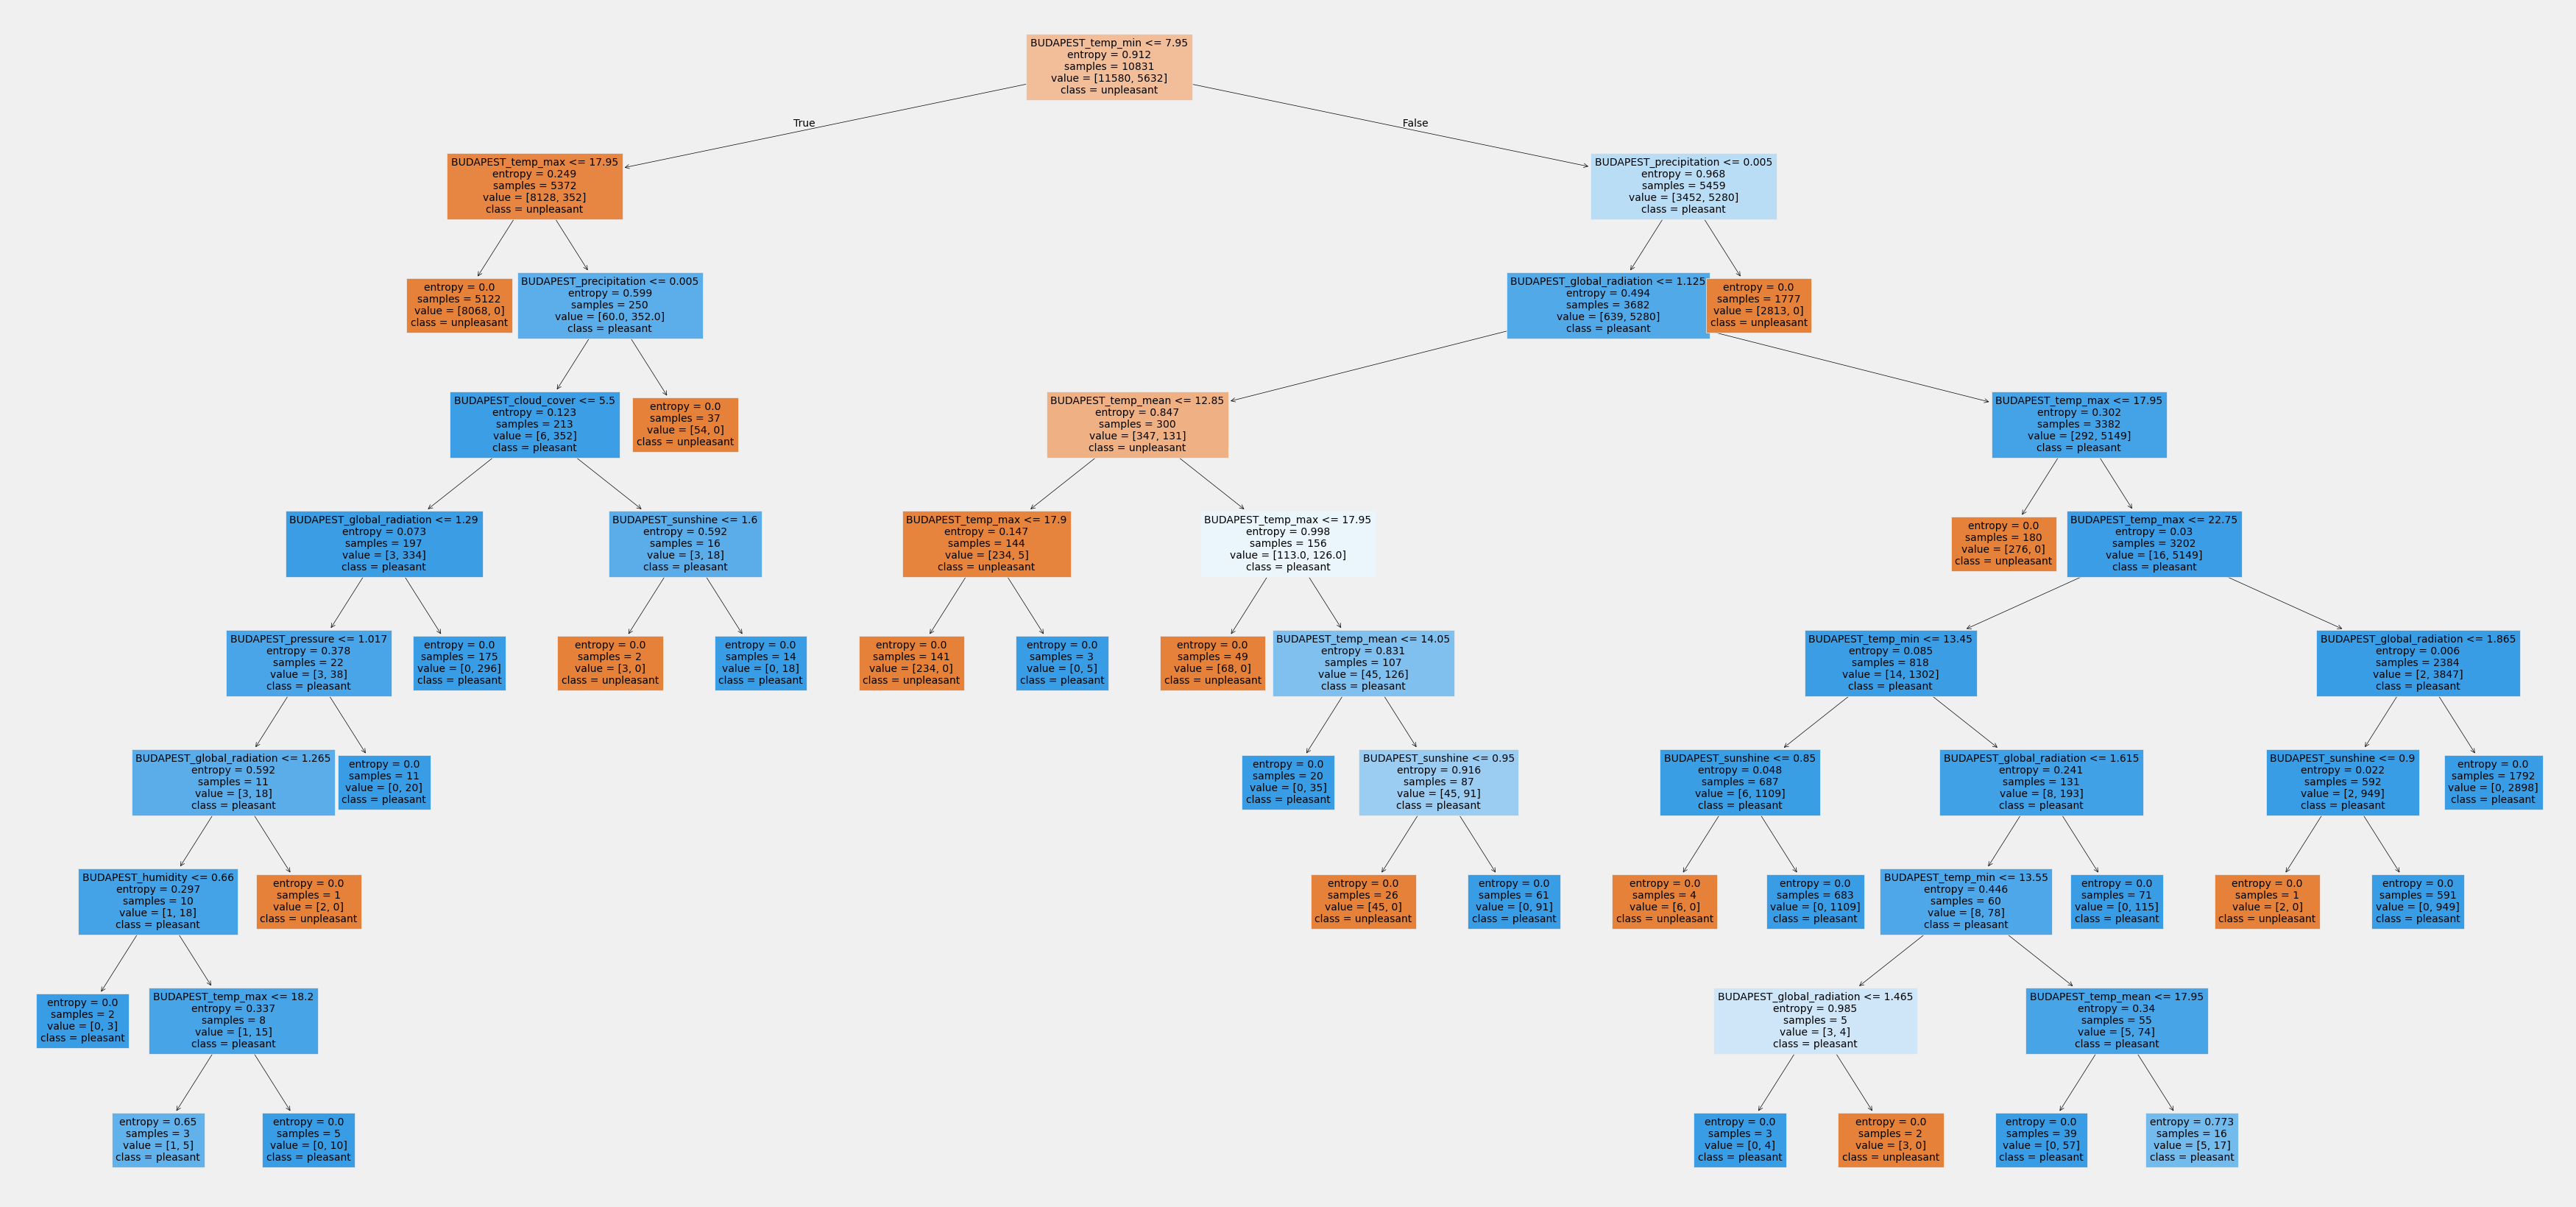

In [155]:
#Plot a tree from the selected random forest
#Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_budapest.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Finding Feature Importance

In [158]:
#Retrieve feature importances from the trained model
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.00918967, 0.00436464, 0.00322839, 0.02610686, 0.34495764,
       0.05754591, 0.1416094 , 0.08165773, 0.33133975])

In [162]:
#Retrieve feature importances from the trained model
budapest_importance = clf3.feature_importances_
print("Feature Importances:", budapest_importance)
print(budapest_importance.shape)

Feature Importances: [0.00918967 0.00436464 0.00322839 0.02610686 0.34495764 0.05754591
 0.1416094  0.08165773 0.33133975]
(9,)


In [164]:
#Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [166]:
# Create a dataframe to associate observation measurements with their importances
budapest_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': budapest_importance
})

In [170]:
# Sort by importance for chart readability
budapest_importance = budapest_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(budapest_importance)

Feature Importance:
        Measurement  Importance
4     precipitation    0.344958
8          temp_max    0.331340
6         temp_mean    0.141609
7          temp_min    0.081658
5          sunshine    0.057546
3  global_radiation    0.026107
0       cloud_cover    0.009190
1          humidity    0.004365
2          pressure    0.003228


<Figure size 1000x600 with 0 Axes>

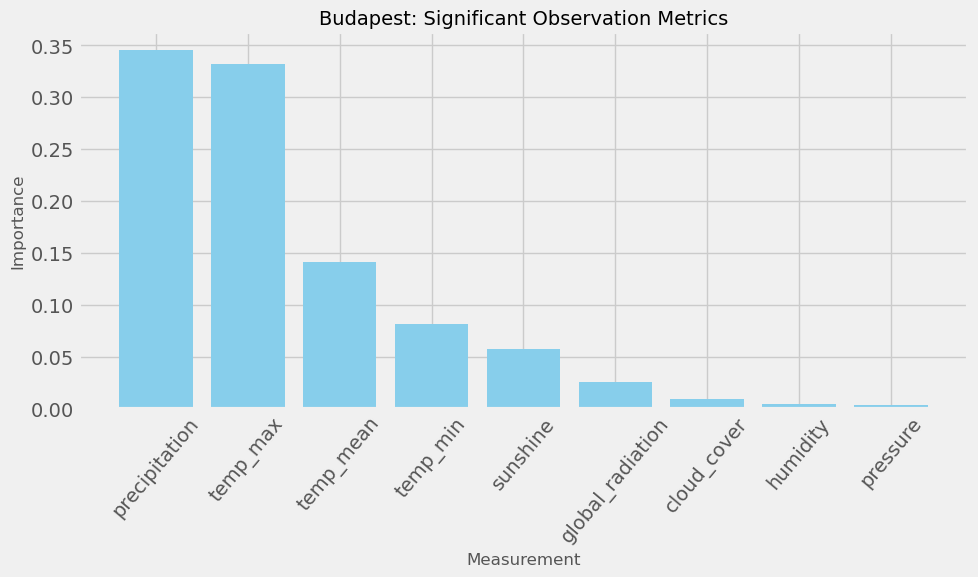

In [178]:
#Plot the importances
plt.style.use('fivethirtyeight')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(budapest_importance['Measurement'], budapest_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()